In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import tensorflow as tf
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout
from keras.activations import relu, softmax, sigmoid
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import DBSCAN


In [20]:
os.chdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceDateDataset")
datasetDir = os.listdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceDateDataset")

In [21]:
dfs = []
for file in datasetDir:
    df = pd.read_csv(file)
    dfs.append(df)
data = pd.concat(dfs)
data.drop(columns=["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0", "text", "Similarity"], inplace=True)
data

,CandidatePosition,NeighbourInformation,Output
0,-0.486797,-0.475342,0
1,-0.473302,-0.475340,0
2,0.575232,0.330898,1
3,-0.535680,-0.493927,0
4,0.651722,-0.493927,0
...,...,...,...
11,0.606355,-0.493927,0
12,0.605394,-0.457813,0
13,-0.467087,-0.493923,0
14,-0.261925,0.269141,0


In [22]:
clusters = DBSCAN().fit(data[["CandidatePosition", "NeighbourInformation"]])

In [23]:
data.loc[:, "NeighbourClass"] = clusters.labels_
data

,CandidatePosition,NeighbourInformation,Output,NeighbourClass
0,-0.486797,-0.475342,0,0
1,-0.473302,-0.475340,0,0
2,0.575232,0.330898,1,1
3,-0.535680,-0.493927,0,0
4,0.651722,-0.493927,0,0
...,...,...,...,...
11,0.606355,-0.493927,0,0
12,0.605394,-0.457813,0,0
13,-0.467087,-0.493923,0,0
14,-0.261925,0.269141,0,1


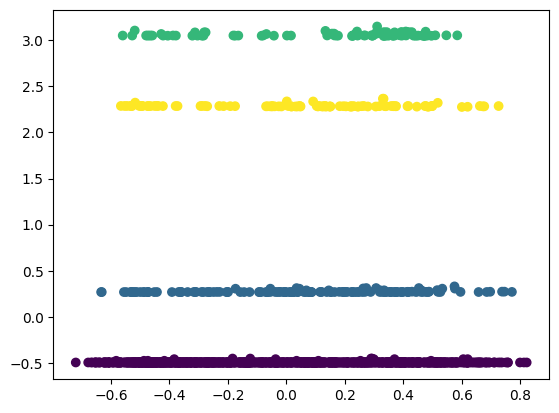

In [24]:
plt.scatter(data["CandidatePosition"], data["NeighbourInformation"], c = data["NeighbourClass"])

In [25]:
data = pd.get_dummies(data, columns=["NeighbourClass"])

In [26]:
data.reset_index(inplace=True)
data.drop(columns=["index"], inplace=True)
data

,CandidatePosition,NeighbourInformation,Output,NeighbourClass_0,NeighbourClass_1,NeighbourClass_2,NeighbourClass_3
0,-0.486797,-0.475342,0,True,False,False,False
1,-0.473302,-0.475340,0,True,False,False,False
2,0.575232,0.330898,1,False,True,False,False
3,-0.535680,-0.493927,0,True,False,False,False
4,0.651722,-0.493927,0,True,False,False,False
...,...,...,...,...,...,...,...
1410,0.606355,-0.493927,0,True,False,False,False
1411,0.605394,-0.457813,0,True,False,False,False
1412,-0.467087,-0.493923,0,True,False,False,False
1413,-0.261925,0.269141,0,False,True,False,False


In [27]:
for index in data.index:
    for col in ["NeighbourClass_0", "NeighbourClass_1", "NeighbourClass_2", "NeighbourClass_3"]:
        if data[col][index] == True:
            data[col][index]=int(1)
        elif data[col][index] == False:
            data[col][index]=int(0)

/tmp/ipykernel_16256/3371370304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][index]=int(1)
/tmp/ipykernel_16256/3371370304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][index]=int(0)
/tmp/ipykernel_16256/3371370304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][index]=int(0)
/tmp/ipykernel_16256/3371370304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [28]:
data

,CandidatePosition,NeighbourInformation,Output,NeighbourClass_0,NeighbourClass_1,NeighbourClass_2,NeighbourClass_3
0,-0.486797,-0.475342,0,1,0,0,0
1,-0.473302,-0.475340,0,1,0,0,0
2,0.575232,0.330898,1,0,1,0,0
3,-0.535680,-0.493927,0,1,0,0,0
4,0.651722,-0.493927,0,1,0,0,0
...,...,...,...,...,...,...,...
1410,0.606355,-0.493927,0,1,0,0,0
1411,0.605394,-0.457813,0,1,0,0,0
1412,-0.467087,-0.493923,0,1,0,0,0
1413,-0.261925,0.269141,0,0,1,0,0


In [29]:
data.corr()

,CandidatePosition,NeighbourInformation,Output,NeighbourClass_0,NeighbourClass_1,NeighbourClass_2,NeighbourClass_3
CandidatePosition,1.000000,0.115233,0.096973,-0.128098,0.074056,0.089635,0.039563
NeighbourInformation,0.115233,1.000000,0.234635,-0.830235,0.088883,0.739664,0.582581
Output,0.096973,0.234635,1.000000,-0.231456,0.124761,0.289339,-0.039201
NeighbourClass_0,-0.128098,-0.830235,-0.231456,1.000000,-0.619378,-0.461474,-0.486149
NeighbourClass_1,0.074056,0.088883,0.124761,-0.619378,1.000000,-0.089006,-0.093766
NeighbourClass_2,0.089635,0.739664,0.289339,-0.461474,-0.089006,1.000000,-0.069861
NeighbourClass_3,0.039563,0.582581,-0.039201,-0.486149,-0.093766,-0.069861,1.000000


In [30]:
def extractData(df):
    train, test = train_test_split(df, test_size=0.2, stratify=df["Output"], shuffle=True)
    xTrain = train.drop(columns = ["Output"]).to_numpy()
    xTest = test.drop(columns = ["Output"]).to_numpy()
    yTrain = train["Output"].to_numpy()
    yTest = test["Output"].to_numpy()
    return xTrain, yTrain, xTest, yTest
xTrain, yTrain, xTest, yTest = extractData(data)

In [31]:
xTrain.shape

(1132, 6)

In [32]:
len(yTrain[yTrain==1])

91

In [33]:
len(yTrain[yTrain==0])

1041

In [34]:
def getModel():
    model = keras.Sequential([
    keras.layers.Dense(8,  input_shape=(6, ), activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=["accuracy", 'Precision', "Recall", "TruePositives", "TrueNegatives", "FalsePositives", "FalseNegatives"])
    
    return model

In [35]:
model = getModel()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 56        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [37]:
tensorX = tf.convert_to_tensor(xTrain, dtype=tf.float32)
tensorY = tf.convert_to_tensor(yTrain, dtype=tf.float32)
history = model.fit(tensorX, tensorY, epochs=100, batch_size=1)

Epoch 1/100
1132/1132 [==============================] - 2s 1ms/step - loss: 0.5034 - accuracy: 0.9072 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 1027.0000 - false_positives: 14.0000 - false_negatives: 91.0000
Epoch 2/100
1132/1132 [==============================] - 1s 892us/step - loss: 0.2683 - accuracy: 0.9196 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 1041.0000 - false_positives: 0.0000e+00 - false_negatives: 91.0000
Epoch 3/100
1132/1132 [==============================] - 1s 921us/step - loss: 0.2456 - accuracy: 0.9196 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 1041.0000 - false_positives: 0.0000e+00 - false_negatives: 91.0000
Epoch 4/100
1132/1132 [==============================] - 1s 867us/step - loss: 0.2440 - accuracy: 0.9196 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 1041.0000 - fals

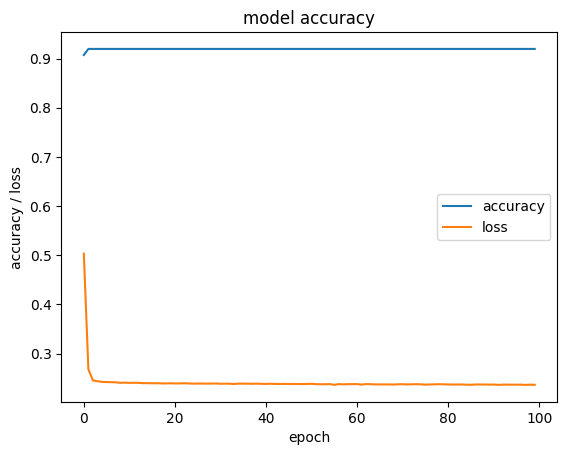

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.legend(["accuracy", "loss"])
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.show()

In [41]:
model.evaluate(tf.convert_to_tensor(xTest, dtype=tf.float32), tf.convert_to_tensor(yTest, dtype=tf.float32))

9/9 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9187 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 260.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000


[0.2618314027786255, 0.9187279343605042, 0.0, 0.0, 0.0, 260.0, 0.0, 23.0]

In [42]:
xgb = XGBClassifier(objective = "binary:hinge", eval_metric = "error")
xgb.fit(xTrain, yTrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:hinge', predictor=None, ...)

In [43]:
pred = xgb.predict(xTest)

In [44]:
cm = confusion_matrix(pred, yTest)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
totalP = TP+FP
totalN = TN+FN
total = totalP+totalN

acc = (TP+TN)/(totalN+totalP)
acc*=100

print("Total : ", total, "\n")
print("True +ve :  ", TP, "     ", "{:.2f}".format((TP/totalP)*100), "%")
print("True -ve :  ", TN, "     " ,"{:.2f}".format((TN/totalN)*100), "%")
print("False +ve : ", FP, "      ", "{:.2f}".format((FP/totalP)*100), "%")
print("False -ve   ", FN, "      ", "{:.2f}".format((FN/totalN)*100), "%")
print("\n")
print("Accuracy :  ", "{:.2f}".format(acc), "%")


Total :  283 

True +ve :   250       96.15 %
True -ve :   6       26.09 %
False +ve :  10        3.85 %
False -ve    17        73.91 %


Accuracy :   90.46 %


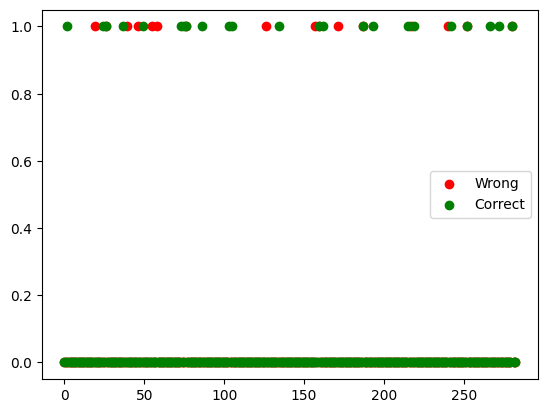

In [45]:
x = [x for x in range(len(xTest))]
plt.scatter(x, pred, color="red")
plt.scatter(x, yTest, color="green")
plt.legend(["Wrong", "Correct"])
plt.show()

In [52]:
df = shuffle(data, random_state=30)
X = df.drop(columns=["Output"])
y = df["Output"]

In [76]:
params = {
    "n_estimators" : [10, 20, 30],
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.07, 0.08, 0.09],
    "num_parallel_tree" : [6, 7, 8],
    "reg_alpha" : [1.4, 1.5, 1.6],
    "reg_lambda" : [1.4, 1.5, 1.6]
}

In [77]:
gridXGB = RandomizedSearchCV(xgb, params, n_jobs=-1, scoring="f1", n_iter=4000, cv=5)
gridXGB.fit(xTrain, yTrain)

/home/aman/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 729 is smaller than n_iter=4000. Running 729 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='error',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_r...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='binary:hinge',
                                           predictor=None, ...),
                   n_iter=4000, n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.08, 0.09],
                                        'max_depth': [5, 6, 7],
                                        'n_estimators': [10, 20, 30],
                                        'num_parallel_tree': [6, 7, 8],
                                        'reg_alpha': [1.4, 1.5, 1.6],
                                        'reg_lambda': [1.4, 1.5, 1.6]},
                   scoring='f1')

In [78]:
bestParams = gridXGB.best_params_
bestParams

{'reg_lambda': 1.4,
 'reg_alpha': 1.4,
 'num_parallel_tree': 6,
 'n_estimators': 10,
 'max_depth': 6,
 'learning_rate': 0.08}

In [79]:
bestModel = gridXGB.best_estimator_
bestModel

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=6,
              objective='binary:hinge', predictor=None, ...)

In [80]:
yPred = bestModel.predict(xTest)

In [82]:
cm = confusion_matrix(yPred, yTest)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
totalP = TP+FP
totalN = TN+FN
total = totalN + totalP

acc = (TP+TN)/(totalN+totalP)
acc*=100

print("Total : ", total, "\n")
print("True +ve :  ", TP, "     ", "{:.2f}".format((TP/totalP)*100), "%")
print("True -ve :  ", TN, "     " ,"{:.2f}".format((TN/totalN)*100), "%")
print("False +ve : ", FP, "      ", "{:.2f}".format((FP/totalP)*100), "%")
print("False -ve   ", FN, "      ", "{:.2f}".format((FN/totalN)*100), "%")
print("\n")
print("Accuracy :  ", "{:.2f}".format(acc), "%")



Total :  283 

True +ve :   244       93.85 %
True -ve :   8       34.78 %
False +ve :  16        6.15 %
False -ve    15        65.22 %


Accuracy :   89.05 %


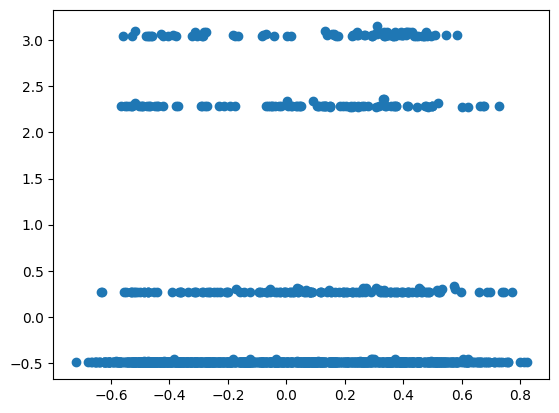

In [83]:
plt.scatter(data["CandidatePosition"], data["NeighbourInformation"])